In [1]:
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy

In [3]:
main_vcf_files = Path("./nextflow_enrichment/result_gene/main-vcf-summaries/").glob("*.json")
main_vcf_entries = []
for main_vcf_file in main_vcf_files:
    with main_vcf_file.open("r") as f:
        afbin = main_vcf_file.name.split("_")[0]
        main_vcf_json = json.load(f)
        main_vcf_df = pd.DataFrame(main_vcf_json)
        main_vcf_df["afbin"] = afbin
        main_vcf_df["category"] = main_vcf_df["svtype"] + "/" + main_vcf_df["feature"]
        main_vcf_entries.append(main_vcf_df)

main_vcf_df = pd.concat(main_vcf_entries, ignore_index=True)
main_vcf_df.sort_values(["afbin", "category"], inplace=True)

main_vcf_df.head(10)

,svtype,feature,count,afbin,category
31,DEL,3utr,95,common,DEL/3utr
32,DEL,5utr,76,common,DEL/5utr
28,DEL,GENE,2536,common,DEL/GENE
33,DEL,cds,45,common,DEL/cds
34,DEL,exon,169,common,DEL/exon
27,DEL,intron,2500,common,DEL/intron
29,DUP,3utr,130,common,DUP/3utr
25,DUP,5utr,69,common,DUP/5utr
18,DUP,GENE,5028,common,DUP/GENE
35,DUP,cds,77,common,DUP/cds


In [4]:
main_vcf_df["log-count"] = main_vcf_df["count"].apply(lambda x : math.log2(x) )
main_vcf_df["category2"] = main_vcf_df["feature"] + "/" + main_vcf_df["svtype"] 
main_vcf_df["category3"] = main_vcf_df["feature"] + "/" + main_vcf_df["afbin"] 
main_vcf_df["category4"] = main_vcf_df["svtype"] + "/" + main_vcf_df["afbin"] 
main_vcf_df["category5"] = main_vcf_df["afbin"] + "/" + main_vcf_df["svtype"] 
main_vcf_df["category6"] = main_vcf_df["afbin"] + "/" + main_vcf_df["feature"] 

main_vcf_df.head(10)

,svtype,feature,count,afbin,category,log-count,category2,category3,category4,category5,category6
31,DEL,3utr,95,common,DEL/3utr,6.569856,3utr/DEL,3utr/common,DEL/common,common/DEL,common/3utr
32,DEL,5utr,76,common,DEL/5utr,6.247928,5utr/DEL,5utr/common,DEL/common,common/DEL,common/5utr
28,DEL,GENE,2536,common,DEL/GENE,11.308339,GENE/DEL,GENE/common,DEL/common,common/DEL,common/GENE
33,DEL,cds,45,common,DEL/cds,5.491853,cds/DEL,cds/common,DEL/common,common/DEL,common/cds
34,DEL,exon,169,common,DEL/exon,7.400879,exon/DEL,exon/common,DEL/common,common/DEL,common/exon
27,DEL,intron,2500,common,DEL/intron,11.287712,intron/DEL,intron/common,DEL/common,common/DEL,common/intron
29,DUP,3utr,130,common,DUP/3utr,7.022368,3utr/DUP,3utr/common,DUP/common,common/DUP,common/3utr
25,DUP,5utr,69,common,DUP/5utr,6.108524,5utr/DUP,5utr/common,DUP/common,common/DUP,common/5utr
18,DUP,GENE,5028,common,DUP/GENE,12.295769,GENE/DUP,GENE/common,DUP/common,common/DUP,common/GENE
35,DUP,cds,77,common,DUP/cds,6.266787,cds/DUP,cds/common,DUP/common,common/DUP,common/cds


In [5]:
n = 5

diverging_colors = sns.color_palette("Blues", n) + sns.color_palette("Oranges", n) + sns.color_palette("Greens", n) + sns.color_palette("Purples", n) + sns.color_palette("Reds", n) + sns.color_palette("Greys", n)

In [14]:
iter_files = Path("./nextflow_enrichment/result_gene/iter-summaries/").glob("*.json")
iter_dfs = []
for iter_file in iter_files:
    with iter_file.open("r") as f:
        afbin = iter_file.name.split("_")[0]
        iter_json = json.load(f)
        iter_df = pd.DataFrame(iter_json)
        iter_df["afbin"] = afbin
        iter_df["category"] = iter_df["svtype"] + "/" + iter_df["feature"]
        iter_dfs.append(iter_df)


iter_df = pd.concat(iter_dfs, ignore_index=True)
iter_df.sort_values(["afbin", "category"], inplace=True)


g = sns.FacetGrid(data=iter_df, col="svtype", sharey=False, height=4)
g.map_dataframe(sns.barplot, x="ccre", y="count", hue="afbin")
g.figure.set_dpi(200)
g.add_legend()

In [15]:
iter_df["log-count"] = iter_df["count"].apply(lambda x : math.log2(x) )

iter_df["category2"] = iter_df["feature"] + "/" + iter_df["svtype"] 
iter_df["category3"] = iter_df["feature"] + "/" + iter_df["afbin"] 
iter_df["category4"] = iter_df["svtype"] + "/" + iter_df["afbin"] 
iter_df["category5"] = iter_df["afbin"] + "/" + iter_df["svtype"] 
iter_df["category6"] = iter_df["afbin"] + "/" + iter_df["feature"] 


In [17]:
main_vcf_df

,svtype,feature,count,afbin,category,log-count,category2,category3,category4,category5,category6
31,DEL,3utr,95,common,DEL/3utr,6.569856,3utr/DEL,3utr/common,DEL/common,common/DEL,common/3utr
32,DEL,5utr,76,common,DEL/5utr,6.247928,5utr/DEL,5utr/common,DEL/common,common/DEL,common/5utr
28,DEL,GENE,2536,common,DEL/GENE,11.308339,GENE/DEL,GENE/common,DEL/common,common/DEL,common/GENE
33,DEL,cds,45,common,DEL/cds,5.491853,cds/DEL,cds/common,DEL/common,common/DEL,common/cds
34,DEL,exon,169,common,DEL/exon,7.400879,exon/DEL,exon/common,DEL/common,common/DEL,common/exon
27,DEL,intron,2500,common,DEL/intron,11.287712,intron/DEL,intron/common,DEL/common,common/DEL,common/intron
48,DEL,3utr,91,rare,DEL/3utr,6.507795,3utr/DEL,3utr/rare,DEL/rare,rare/DEL,rare/3utr
49,DEL,5utr,85,rare,DEL/5utr,6.409391,5utr/DEL,5utr/rare,DEL/rare,rare/DEL,rare/5utr
45,DEL,GENE,577,rare,DEL/GENE,9.172428,GENE/DEL,GENE/rare,DEL/rare,rare/DEL,rare/GENE
46,DEL,cds,49,rare,DEL/cds,5.614710,cds/DEL,cds/rare,DEL/rare,rare/DEL,rare/cds


In [19]:
# Keep index for easy lambda function
main_grp = main_vcf_df.groupby(["afbin", "svtype", "feature"]).mean("count")
main_grp

count  log-count
afbin     svtype feature                    
common    DEL    3utr        95.0   6.569856
                 5utr        76.0   6.247928
                 GENE      2536.0  11.308339
                 cds         45.0   5.491853
                 exon       169.0   7.400879
                 intron    2500.0  11.287712
          DUP    3utr       130.0   7.022368
                 5utr        69.0   6.108524
                 GENE      5028.0  12.295769
                 cds         77.0   6.266787
                 exon       254.0   7.988685
                 intron    4900.0  12.258566
          INS    3utr        84.0   6.392317
                 5utr        46.0   5.523562
                 GENE      2803.0  11.452756
                 cds         63.0   5.977280
                 exon       178.0   7.475733
                 intron    2759.0  11.429930
rare      DEL    3utr        91.0   6.507795
                 5utr        85.0   6.409391
                 GENE       577.0   9.172428
                 cds         49.0   5.614710
                 exon       170.0   7.409391
                 intron     550.0   9.103288
          DUP    3utr       208.0   7.700440
                 5utr       177.0   7.467606
                 GENE      3793.0  11.889124
                 cds        150.0   7.228819
                 exon       360.0   8.491853
                 intron    3710.0  11.857203
          INS    3utr        96.0   6.584963
                 5utr        49.0   5.614710
                 GENE      2292.0  11.162391
                 cds         98.0   6.614710
                 exon       214.0   7.741467
                 intron    2248.0  11.134426
ultrarare DEL    3utr       784.0   9.614710
                 5utr       758.0   9.566054
                 GENE      3372.0  11.719389
                 cds        698.0   9.447083
                 exon      1518.0  10.567956
                 intron    3274.0  11.676839
          DUP    3utr      1202.0  10.231221
                 5utr      1048.0  10.033423
                 GENE      9248.0  13.174926
                 cds        943.0   9.881114
                 exon      1873.0  10.871135
                 intron    8907.0  13.120724
          INS    3utr       571.0   9.157347
                 5utr       355.0   8.471675
                 GENE     11736.0  13.518653
                 cds        604.0   9.238405
                 exon      1351.0  10.399812
                 intron   11416.0  13.478770

In [20]:

iter_df["logFC"] = iter_df.apply(lambda x : math.log2( main_grp.loc[ (x["afbin"], x["svtype"], x["feature"]) , "count" ] /  x["count"] ) , axis=1)
iter_df_grp = iter_df.groupby(["afbin", "svtype", "feature"]).agg({'logFC':['mean', 'std']})

iter_df_grp

logFC          
                              mean       std
afbin     svtype feature                    
common    DEL    3utr    -0.994252  0.098433
                 5utr    -1.025659  0.108652
                 GENE    -0.060618  0.018518
                 cds     -2.594659  0.080974
                 exon    -1.495966  0.058513
                 intron  -0.033177  0.019299
          DUP    3utr    -0.770795  0.095143
                 5utr    -0.887440  0.125275
                 GENE    -0.023547  0.013265
                 cds     -1.541338  0.094198
                 exon    -1.003236  0.061270
                 intron  -0.006559  0.013843
          INS    3utr    -0.587248  0.127984
                 5utr    -0.749723  0.160820
                 GENE    -0.030869  0.018113
                 cds     -1.179703  0.117699
                 exon    -0.782037  0.079089
                 intron  -0.004866  0.018774
rare      DEL    3utr    -0.424987  0.118005
                 5utr    -0.546873  0.115526
                 GENE    -0.183514  0.035869
                 cds     -1.957961  0.091473
                 exon    -0.789492  0.067851
                 intron  -0.206111  0.037401
          DUP    3utr    -0.345961  0.080459
                 5utr    -0.205358  0.086709
                 GENE    -0.030071  0.015080
                 cds     -0.979526  0.074876
                 exon    -0.637927  0.052753
                 intron  -0.008283  0.015772
          INS    3utr    -0.126480  0.139775
                 5utr    -0.536013  0.168424
                 GENE     0.121038  0.020621
                 cds     -0.436671  0.122185
                 exon    -0.299535  0.084598
                 intron   0.141224  0.021430
ultrarare DEL    3utr    -0.411078  0.036879
                 5utr    -0.523864  0.035728
                 GENE    -0.088411  0.014201
                 cds     -1.023320  0.031162
                 exon    -0.501941  0.022653
                 intron  -0.084343  0.014823
          DUP    3utr     0.117503  0.034391
                 5utr     0.061934  0.034286
                 GENE    -0.000882  0.009719
                 cds     -0.382504  0.032741
                 exon    -0.125940  0.024333
                 intron  -0.002951  0.010110
          INS    3utr    -0.071802  0.058242
                 5utr    -0.282314  0.067586
                 GENE     0.081491  0.009332
                 cds     -0.415979  0.048899
                 exon    -0.186812  0.035186
                 intron   0.087755  0.009684

In [23]:
# Annotate main with logFC from iter_df_grp
main_vcf_df["logFC"] = main_vcf_df.apply(lambda x : iter_df_grp.loc[ (x["afbin"], x["svtype"], x["feature"]) , 'logFC']['mean'] , axis=1)
main_vcf_df["logFC_stdev"] = main_vcf_df.apply(lambda x : iter_df_grp.loc[ (x["afbin"], x["svtype"], x["feature"]) , 'logFC']['std'] , axis=1)
main_vcf_df

,svtype,feature,count,afbin,category,log-count,category2,category3,category4,category5,category6,normalityTest,z-score,logFC,logFC_stdev
31,DEL,3utr,95,common,DEL/3utr,6.569856,3utr/DEL,3utr/common,DEL/common,common/DEL,common/3utr,"(0.9979212880134583, 1.9714943566562226e-10)",-10.100775,-0.994252,0.098433
32,DEL,5utr,76,common,DEL/5utr,6.247928,5utr/DEL,5utr/common,DEL/common,common/DEL,common/5utr,"(0.9980477094650269, 5.707230799067986e-10)",-9.439856,-1.025659,0.108652
28,DEL,GENE,2536,common,DEL/GENE,11.308339,GENE/DEL,GENE/common,DEL/common,common/DEL,common/GENE,"(0.9996539950370789, 0.0726647824048996)",-3.273427,-0.060618,0.018518
33,DEL,cds,45,common,DEL/cds,5.491853,cds/DEL,cds/common,DEL/common,common/DEL,common/cds,"(0.9987508654594421, 4.968767939317331e-07)",-32.043148,-2.594659,0.080974
34,DEL,exon,169,common,DEL/exon,7.400879,exon/DEL,exon/common,DEL/common,common/DEL,common/exon,"(0.9993923306465149, 0.0015189098194241524)",-25.566366,-1.495966,0.058513
27,DEL,intron,2500,common,DEL/intron,11.287712,intron/DEL,intron/common,DEL/common,common/DEL,common/intron,"(0.9997186064720154, 0.1833861619234085)",-1.719136,-0.033177,0.019299
48,DEL,3utr,91,rare,DEL/3utr,6.507795,3utr/DEL,3utr/rare,DEL/rare,rare/DEL,rare/3utr,"(0.997372567653656, 2.9222180231158745e-12)",-3.601440,-0.424987,0.118005
49,DEL,5utr,85,rare,DEL/5utr,6.409391,5utr/DEL,5utr/rare,DEL/rare,rare/DEL,rare/5utr,"(0.996396541595459, 5.4183092508422546e-15)",-4.733764,-0.546873,0.115526
45,DEL,GENE,577,rare,DEL/GENE,9.172428,GENE/DEL,GENE/rare,DEL/rare,rare/DEL,rare/GENE,"(0.9993088245391846, 0.0004690429486799985)",-5.116229,-0.183514,0.035869
46,DEL,cds,49,rare,DEL/cds,5.614710,cds/DEL,cds/rare,DEL/rare,rare/DEL,rare/cds,"(0.9978300333023071, 9.370654946438961e-11)",-21.404728,-1.957961,0.091473


In [24]:
# Z-score from permutation
main_vcf_df["z-score"] = main_vcf_df.apply(lambda x :  ( iter_df.loc[ (iter_df["afbin"] == x["afbin"] ) & (iter_df["svtype"] == x["svtype"]) & (iter_df["feature"] == x["feature"] ) , "logFC"] ).mean() / ( iter_df.loc[ (iter_df["afbin"] == x["afbin"] ) & (iter_df["svtype"] == x["svtype"]) & (iter_df["feature"] == x["feature"] ) , "logFC"] ).std()  , axis=1 )


In [25]:
main_vcf_df["p-value"] = main_vcf_df["z-score"].apply(lambda x : scipy.stats.norm.sf( abs(x) ) )

main_vcf_df

,svtype,feature,count,afbin,category,log-count,category2,category3,category4,category5,category6,normalityTest,z-score,logFC,logFC_stdev,p-value
31,DEL,3utr,95,common,DEL/3utr,6.569856,3utr/DEL,3utr/common,DEL/common,common/DEL,common/3utr,"(0.9979212880134583, 1.9714943566562226e-10)",-10.100775,-0.994252,0.098433,2.740354e-24
32,DEL,5utr,76,common,DEL/5utr,6.247928,5utr/DEL,5utr/common,DEL/common,common/DEL,common/5utr,"(0.9980477094650269, 5.707230799067986e-10)",-9.439856,-1.025659,0.108652,1.866464e-21
28,DEL,GENE,2536,common,DEL/GENE,11.308339,GENE/DEL,GENE/common,DEL/common,common/DEL,common/GENE,"(0.9996539950370789, 0.0726647824048996)",-3.273427,-0.060618,0.018518,5.312585e-04
33,DEL,cds,45,common,DEL/cds,5.491853,cds/DEL,cds/common,DEL/common,common/DEL,common/cds,"(0.9987508654594421, 4.968767939317331e-07)",-32.043148,-2.594659,0.080974,1.367520e-225
34,DEL,exon,169,common,DEL/exon,7.400879,exon/DEL,exon/common,DEL/common,common/DEL,common/exon,"(0.9993923306465149, 0.0015189098194241524)",-25.566366,-1.495966,0.058513,1.805771e-144
27,DEL,intron,2500,common,DEL/intron,11.287712,intron/DEL,intron/common,DEL/common,common/DEL,common/intron,"(0.9997186064720154, 0.1833861619234085)",-1.719136,-0.033177,0.019299,4.279485e-02
48,DEL,3utr,91,rare,DEL/3utr,6.507795,3utr/DEL,3utr/rare,DEL/rare,rare/DEL,rare/3utr,"(0.997372567653656, 2.9222180231158745e-12)",-3.601440,-0.424987,0.118005,1.582300e-04
49,DEL,5utr,85,rare,DEL/5utr,6.409391,5utr/DEL,5utr/rare,DEL/rare,rare/DEL,rare/5utr,"(0.996396541595459, 5.4183092508422546e-15)",-4.733764,-0.546873,0.115526,1.101970e-06
45,DEL,GENE,577,rare,DEL/GENE,9.172428,GENE/DEL,GENE/rare,DEL/rare,rare/DEL,rare/GENE,"(0.9993088245391846, 0.0004690429486799985)",-5.116229,-0.183514,0.035869,1.558525e-07
46,DEL,cds,49,rare,DEL/cds,5.614710,cds/DEL,cds/rare,DEL/rare,rare/DEL,rare/cds,"(0.9978300333023071, 9.370654946438961e-11)",-21.404728,-1.957961,0.091473,6.036195e-102


In [26]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return '****'
    elif pvalue <= 0.001:
        return '***'
    elif pvalue <= 0.01:
        return '**'
    elif pvalue <= 0.05:
        return '*'
    return "ns"

pvalue="p-value"
main_vcf_df["asterix"] = main_vcf_df[pvalue].apply(lambda x :  convert_pvalue_to_asterisks( abs(x) ) )
main_vcf_df

,svtype,feature,count,afbin,category,log-count,category2,category3,category4,category5,category6,normalityTest,z-score,logFC,logFC_stdev,p-value,asterix
31,DEL,3utr,95,common,DEL/3utr,6.569856,3utr/DEL,3utr/common,DEL/common,common/DEL,common/3utr,"(0.9979212880134583, 1.9714943566562226e-10)",-10.100775,-0.994252,0.098433,2.740354e-24,****
32,DEL,5utr,76,common,DEL/5utr,6.247928,5utr/DEL,5utr/common,DEL/common,common/DEL,common/5utr,"(0.9980477094650269, 5.707230799067986e-10)",-9.439856,-1.025659,0.108652,1.866464e-21,****
28,DEL,GENE,2536,common,DEL/GENE,11.308339,GENE/DEL,GENE/common,DEL/common,common/DEL,common/GENE,"(0.9996539950370789, 0.0726647824048996)",-3.273427,-0.060618,0.018518,5.312585e-04,***
33,DEL,cds,45,common,DEL/cds,5.491853,cds/DEL,cds/common,DEL/common,common/DEL,common/cds,"(0.9987508654594421, 4.968767939317331e-07)",-32.043148,-2.594659,0.080974,1.367520e-225,****
34,DEL,exon,169,common,DEL/exon,7.400879,exon/DEL,exon/common,DEL/common,common/DEL,common/exon,"(0.9993923306465149, 0.0015189098194241524)",-25.566366,-1.495966,0.058513,1.805771e-144,****
27,DEL,intron,2500,common,DEL/intron,11.287712,intron/DEL,intron/common,DEL/common,common/DEL,common/intron,"(0.9997186064720154, 0.1833861619234085)",-1.719136,-0.033177,0.019299,4.279485e-02,*
48,DEL,3utr,91,rare,DEL/3utr,6.507795,3utr/DEL,3utr/rare,DEL/rare,rare/DEL,rare/3utr,"(0.997372567653656, 2.9222180231158745e-12)",-3.601440,-0.424987,0.118005,1.582300e-04,***
49,DEL,5utr,85,rare,DEL/5utr,6.409391,5utr/DEL,5utr/rare,DEL/rare,rare/DEL,rare/5utr,"(0.996396541595459, 5.4183092508422546e-15)",-4.733764,-0.546873,0.115526,1.101970e-06,****
45,DEL,GENE,577,rare,DEL/GENE,9.172428,GENE/DEL,GENE/rare,DEL/rare,rare/DEL,rare/GENE,"(0.9993088245391846, 0.0004690429486799985)",-5.116229,-0.183514,0.035869,1.558525e-07,****
46,DEL,cds,49,rare,DEL/cds,5.614710,cds/DEL,cds/rare,DEL/rare,rare/DEL,rare/cds,"(0.9978300333023071, 9.370654946438961e-11)",-21.404728,-1.957961,0.091473,6.036195e-102,****


/tmp/ipykernel_13500/3096404927.py:25: UserWarning: The palette list has more values (18) than needed (9), which may not be intended.
  plots = sns.barplot( x=level1 , y=level_y , hue=level2 , data=main_vcf_df, ax=ax, zorder=2 , palette = diverging_colors )


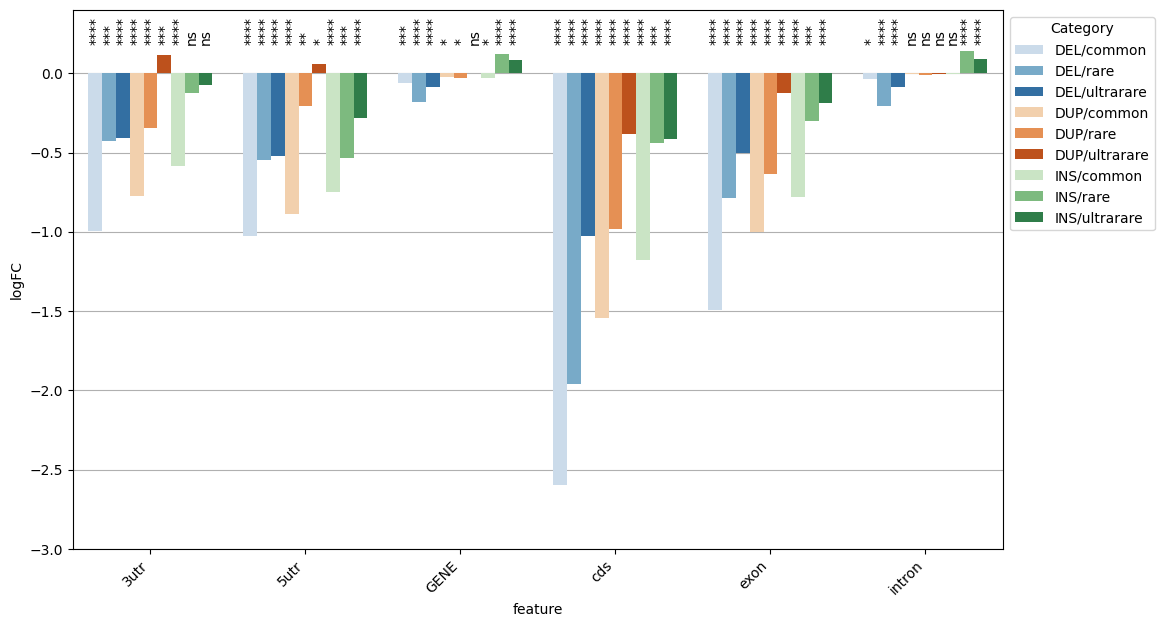

In [37]:
n = 3
level1="feature"
level2="category4"
level_y="logFC"

# error choice: sd 
# errorBar=("sd" , 2)
# errorBar=("ci" , 95)
# errorBar=("se" ,2 )
# errorBar=("pi" , 95)

y_asterix=0.2
ylimit=(-3,y_asterix+0.2)


################################
diverging_colors = sns.color_palette("Blues", n) + sns.color_palette("Oranges", n) + sns.color_palette("Greens", n) + sns.color_palette("Purples", n) + sns.color_palette("Reds", n) + sns.color_palette("Greys", n)

iter_df.sort_values([level1, level2], inplace=True)
# Re-sort main_vcf_df due to iteration over plots.patches is done on the category level first
main_vcf_df.sort_values([level2, level1], inplace=True)

fig, ax = plt.subplots(figsize=(12,7), dpi=100)
#plots = sns.barplot( x=level1 , y=level_y , hue=level2 , data=iter_df, ax=ax, zorder=2 , palette = diverging_colors , errorbar= errorBar )
plots = sns.barplot( x=level1 , y=level_y , hue=level2 , data=main_vcf_df, ax=ax, zorder=2 , palette = diverging_colors )
plt.xticks(rotation=45, ha="right")
ax.grid(axis="y")
ax.legend(title ='Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(ylim=ylimit)

# Manual annotation of barplot
# https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
# obtain asterix annotation as list after sorting
asterix=main_vcf_df["asterix"].tolist()

for iter_i , bar in enumerate(plots.patches):
    if( iter_i < len(asterix)):
        plots.text(x=bar.get_x(), y=y_asterix, s= asterix[iter_i] , rotation="vertical")